## This notebook is for testing our model with images not in training or test set

In [5]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
from io import BytesIO
from tensorflow.keras.preprocessing import image

In [6]:
# load model
catDog_model = keras.models.load_model('cat_or_dog_CNN.keras')

In [7]:
catDog_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 38, 38, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 38, 38, 16)        0

In [8]:
# function to preprocess and predict images
def image_predict(image_path):
    #display image
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis("off")
    
    #read in image at desired pixel size
    image_size = (150, 150)
    with open(image_path, 'rb') as raw:
      im = image.load_img(BytesIO(raw.read()), target_size=image_size, color_mode="grayscale")
    #covert to array and normalize
    image_arr = image.img_to_array(im)
    image_arr /= 255
    #reshape to model input dims
    image_proc = image_arr.reshape(1,150,150,1)
    #predict and print prediction
    prob = catDog_model.predict(image_proc)[0]
    if prob[0] >= 0.5:
        print("Prediction: DOG")
    else:
        print('Prediction: CAT')

1/1 [==============================] - 0s 173ms/step
Prediction: DOG


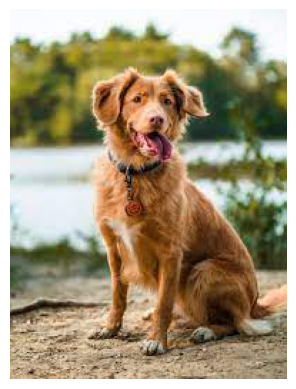

In [9]:
image_path = '../Animal_Images/test_animals/test_dog.jpg'

# predict image
image_predict(image_path)

1/1 [==============================] - 0s 22ms/step
Prediction: CAT


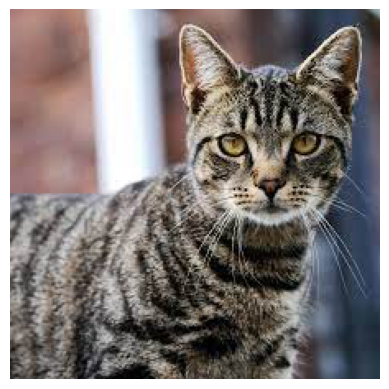

In [10]:
image_path = '../Animal_Images/test_animals/test_cat.jpg'

# predict image
image_predict(image_path)

1/1 [==============================] - 0s 31ms/step
Prediction: DOG


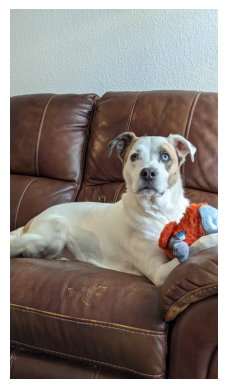

In [11]:
image_path = '../Animal_Images/test_animals/stud_test.jpg'

# predict image
image_predict(image_path)

1/1 [==============================] - 0s 39ms/step
Prediction: CAT


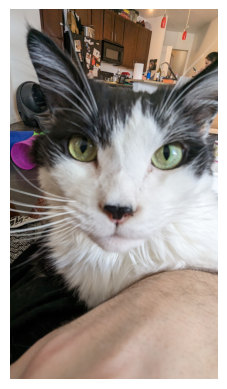

In [12]:
image_path = '../Animal_Images/test_animals/oreo_test.jpg'

# predict image
image_predict(image_path)